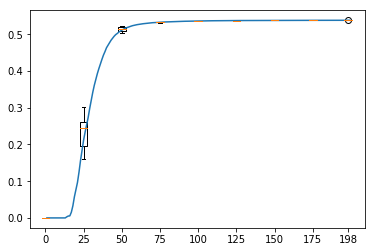

ZDT2 - mean hypervolume:  0.538105221471 +/- 8.40540690133e-05


In [6]:
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt

%matplotlib inline

function = 'ZDT2'

try:
    with open(''.join(['files/HV_',function,'_MOMCEDA','.pk1']), 'r') as filename:
        hv = pickle.load(filename)
        
    meanHV = hv.mean(axis=0)
    NGer = len(meanHV)
    stdHV = hv.std(axis=0)
    pos = np.append(np.arange(0,NGer,25),NGer-1)
    plt.boxplot(hv[:,pos],positions=pos,widths=5)
    plt.plot(np.arange(1,NGer+1),meanHV)
    axes = plt.gca()
    axes.set_xlim([-10,NGer+10])
    plt.show()
    print function, '- mean hypervolume: ', np.mean(hv[:,-1]),'+/-',np.std(hv[:,-1])
    
except IOError: # Caso o arquivo nao exista, realiza o treinamento
    print 'Arquivo nao encontrado'

In [2]:
print meanHV.shape

(199,)


In [1]:
%run MOMCEDA/nsga2.py

seed = 10
function = 'ZDT1'
nReps = 10
NEval = 20000
NPop = 100
refPoint = [1.1, 1.1]

runNSGA2(seed,function,nReps,NEval,NPop,refPoint)

Starting execution 1 ...
Hypervolume =  0.86860469341
Convergence =  0.00170581851407
Execution 1  completed in  6.518240 seconds

Starting execution 2 ...
Hypervolume =  0.867166150973
Convergence =  0.00236983005345
Execution 2  completed in  6.534255 seconds

Starting execution 3 ...
Hypervolume =  0.868072109005
Convergence =  0.0020303570174
Execution 3  completed in  6.500135 seconds

Starting execution 4 ...


KeyboardInterrupt: 

In [7]:
%matplotlib qt

%run ../dev/MOMCEDA/HVbar.py

function = 'ZDT1'
nReps = 10
NEval = 20000

showHVBar(function,nReps,NEval)

In [1]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})



In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
x = [100, 90, 80, 90]
y = [95, 85, 75, 95]
trace = go.Table(
    header=dict(values=['Problem', 'Average','Standard deviation']),
    cells=dict(values=[['ZDT1','ZDT2','ZDT3','ZDT4','ZDT6'],x,y]))

data = [trace] 
plotly.offline.iplot(data, filename = 'basic_table')

In [6]:
import cPickle as pickle
import json
import numpy as np

problems = [1,2,3,4,6]
for i in problems:
    print 'Final values for ZDT',i,' problem:'
    print 'Metric         Algorithm     Average    Std. deviation'
    
    with open(''.join(['../dev/files/HV_ZDT',str(i),'_MOMCEDA.pk1']),'r') as filename:
        hv1 = pickle.load(filename)
    meanHV1 = hv1[:,-1].mean(axis=0)
    stdHV1 = hv1[:,-1].std(axis=0)
    
    with open(''.join(['../dev/files/conv_ZDT',str(i),'_MOMCEDA.json']),'r') as filename:
        conv1 = np.asarray(json.load(filename))
    meanconv1 = conv1.mean(axis=0)
    stdconv1 = conv1.std(axis=0)
    
    with open(''.join(['../dev/files/HV_ZDT',str(i),'_NSGA2.json']),'r') as filename:
        hv2 = np.asarray(json.load(filename))
    meanHV2 = hv2[:,-1].mean(axis=0)
    stdHV2 = hv2[:,-1].std(axis=0)
    
    with open(''.join(['../dev/files/conv_ZDT',str(i),'_NSGA2.json']),'r') as filename:
        conv2 = np.asarray(json.load(filename))
    meanconv2 = conv2.mean(axis=0)
    stdconv2 = conv2.std(axis=0)
    
    print 'Hypervolume    MOMCEDA      %f    %.2E' %(meanHV1,stdHV1)
    print '               NSGA-II      %f    %.2E' %(meanHV2,stdHV2)
    print 'Convergence    MOMCEDA      %f    %.2E' %(meanconv1,stdconv1)
    print '               NSGA-II      %f    %.2E\n' %(meanconv2,stdconv2)

Final values for ZDT 1  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      0.871316    7.84E-05
               NSGA-II      0.868347    4.91E-04
Convergence    MOMCEDA      0.000490    4.63E-05
               NSGA-II      0.002068    2.15E-04

Final values for ZDT 2  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      0.538105    8.41E-05
               NSGA-II      0.534382    6.82E-04
Convergence    MOMCEDA      0.000472    4.38E-05
               NSGA-II      0.002178    4.05E-04

Final values for ZDT 3  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      1.328007    2.96E-04
               NSGA-II      1.326033    5.26E-04
Convergence    MOMCEDA      0.001181    9.86E-05
               NSGA-II      0.001678    2.04E-04

Final values for ZDT 4  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      0.853892    2.85E-02
        

In [4]:
print conv1

[0.000418844466315151, 0.00044795855533343677, 0.0005270048169883336, 0.00046188995947863987, 0.0005189769175250389, 0.0005568201164955465, 0.0005442576393783982, 0.0005186502267629926, 0.0004337698765580536, 0.0004749625279806026]


In [9]:
plt.close('all')